## Skenario 3 
### Dengan Conv 64, hidden layer 256, lr 0.1

In [ ]:
# akses Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
##### CNN MODEL ####
%tensorflow_version 1.x 
import warnings
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras import initializers
from keras.preprocessing.image import ImageDataGenerator


warnings.filterwarnings("ignore")


TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializers.he_uniform(seed=1), padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(256, activation='relu', kernel_initializer=initializers.he_uniform(seed=1)))
	model.add(Dense(3, activation='softmax'))
	# compile model
	opt = SGD(lr=0.1, momentum=0.9)
	#opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.099, amsgrad=False)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	%matplotlib inline
	pyplot.figure(figsize=(8, 8), dpi=300)
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Model Cross Entropy Loss')
	pyplot.xlabel('Number of Epochs')
	pyplot.ylabel('Cross Entropy Loss')
	pyplot.ylim(0,2)
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	pyplot.legend()
	print("\n")
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Model Classification Accuracy')
	pyplot.xlabel('Number of Epochs')
	pyplot.ylabel('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	pyplot.legend()
	pyplot.tight_layout(pad=2.0)
	pyplot.show()
	#print(history.history.keys())
  #dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
  # save plot to file
	#filename = sys.argv[0].split('/')[-1]
	#pyplot.savefig(filename + '_plot.png')
	#pyplot.close()

In [ ]:
### COBA Confusion Matrix (bisa)

# run the test harness for evaluating a model
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
def run_test_harness():
  # define model
  model = define_model()
  # create data generator
  datagen = ImageDataGenerator(rescale=1.0/255.0)
  #datagen = ImageDataGenerator()
  # prepare iterators
  train_it = datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/Dataset/RIPCurrent_keras/train/',
  	class_mode='categorical', batch_size=8, target_size=(200, 200))
  test_it = datagen.flow_from_directory('/content/gdrive/My Drive/Colab Notebooks/Dataset/RIPCurrent_keras/test/',
  	class_mode='categorical', batch_size=8, target_size=(200, 200))
  # fit model
  history = model.fit_generator(train_it, steps_per_epoch=len(train_it)/8,
  	validation_data=test_it, validation_steps=len(test_it)/8, epochs=50, verbose=2)
  # evaluate model
  # predict test data
  # Save history training data
  loss = pd.DataFrame(history.history) 
  hist_csv_file = 'history.csv'
  with open(hist_csv_file, mode='w') as f:
    loss.to_csv(f)
  #test_it.reset()
  Y_pred = model.predict_generator(test_it)
  classes = test_it.classes[test_it.index_array]
  y_pred = np.argmax(Y_pred, axis=-1)
  # using confusion matrix
  cm = confusion_matrix(test_it.classes[test_it.index_array],y_pred)
  confusmatrix = pd.DataFrame(cm)
  confusmatrix.columns = ['Rip 1','Rip 2','No Rip']
  confusmatrix.rename(index={0:'Rip 1', 1:'Rip 2', 2:'No Rip'}, inplace=True)  
  plot_cm = sns.heatmap(confusmatrix, annot=True, fmt="d")
  pyplot.xlabel("Predicted Label")
  pyplot.ylabel("True Label")
  pyplot.show()
  # calculate Accuracy
  _, acc = model.evaluate_generator(test_it, steps=2, verbose=0)
  print('Akurasi Model: %.5f' % (acc * 100.0))
  # learning curves
  summarize_diagnostics(history)
  # save model
  model.save('rip_model.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Found 444 images belonging to 3 classes.
Found 141 images belonging to 3 classes.

Epoch 1/50
 - 28s - loss: 6003.7549 - accuracy: 0.4107 - val_loss: 1.0762 - val_accuracy: 0.4583
Epoch 2/50
 - 23s - loss: 1.1846 - accuracy: 0.2692 - val_loss: 1.0577 - val_accuracy: 0.3750
Epoch 3/50
 - 19s - loss: 1.1623 - accuracy: 0.3214 - val_loss: 1.1644 - val_accuracy: 0.2917
Epoch 4/50
 - 30s - loss: 1.1826 - accuracy: 0.2679 - val_loss: 1.1805 - val_accuracy: 0.3750
Epoch 5/50
 - 19s - loss: 1.0911 - accuracy: 0.4107 - val_loss: 1.2105 - val_accuracy: 0.3333
Epoch 6/50
 - 24s - loss: 1.1420 - accuracy: 0.3036 - val_loss: 1.1479 - val_accuracy: 0.3810
Epoch 7/50
 - 21s - loss: 1.0846 - accuracy: 0.3929 - val_loss: 1.1585 - val_accuracy: 0.2917
Epoch 8/50
 - 19s - loss: 1.1725 - accuracy: 0.3214 - val_loss: 1.1017 - val_accuracy: 0.4167
Epoch 9/50
 - 13s - loss: 1.1225 - accuracy: 0.3571 - val_loss: 1.1256 - val_acc

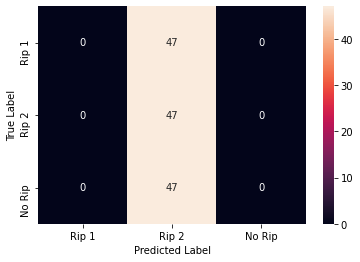

Akurasi Model: 50.00000




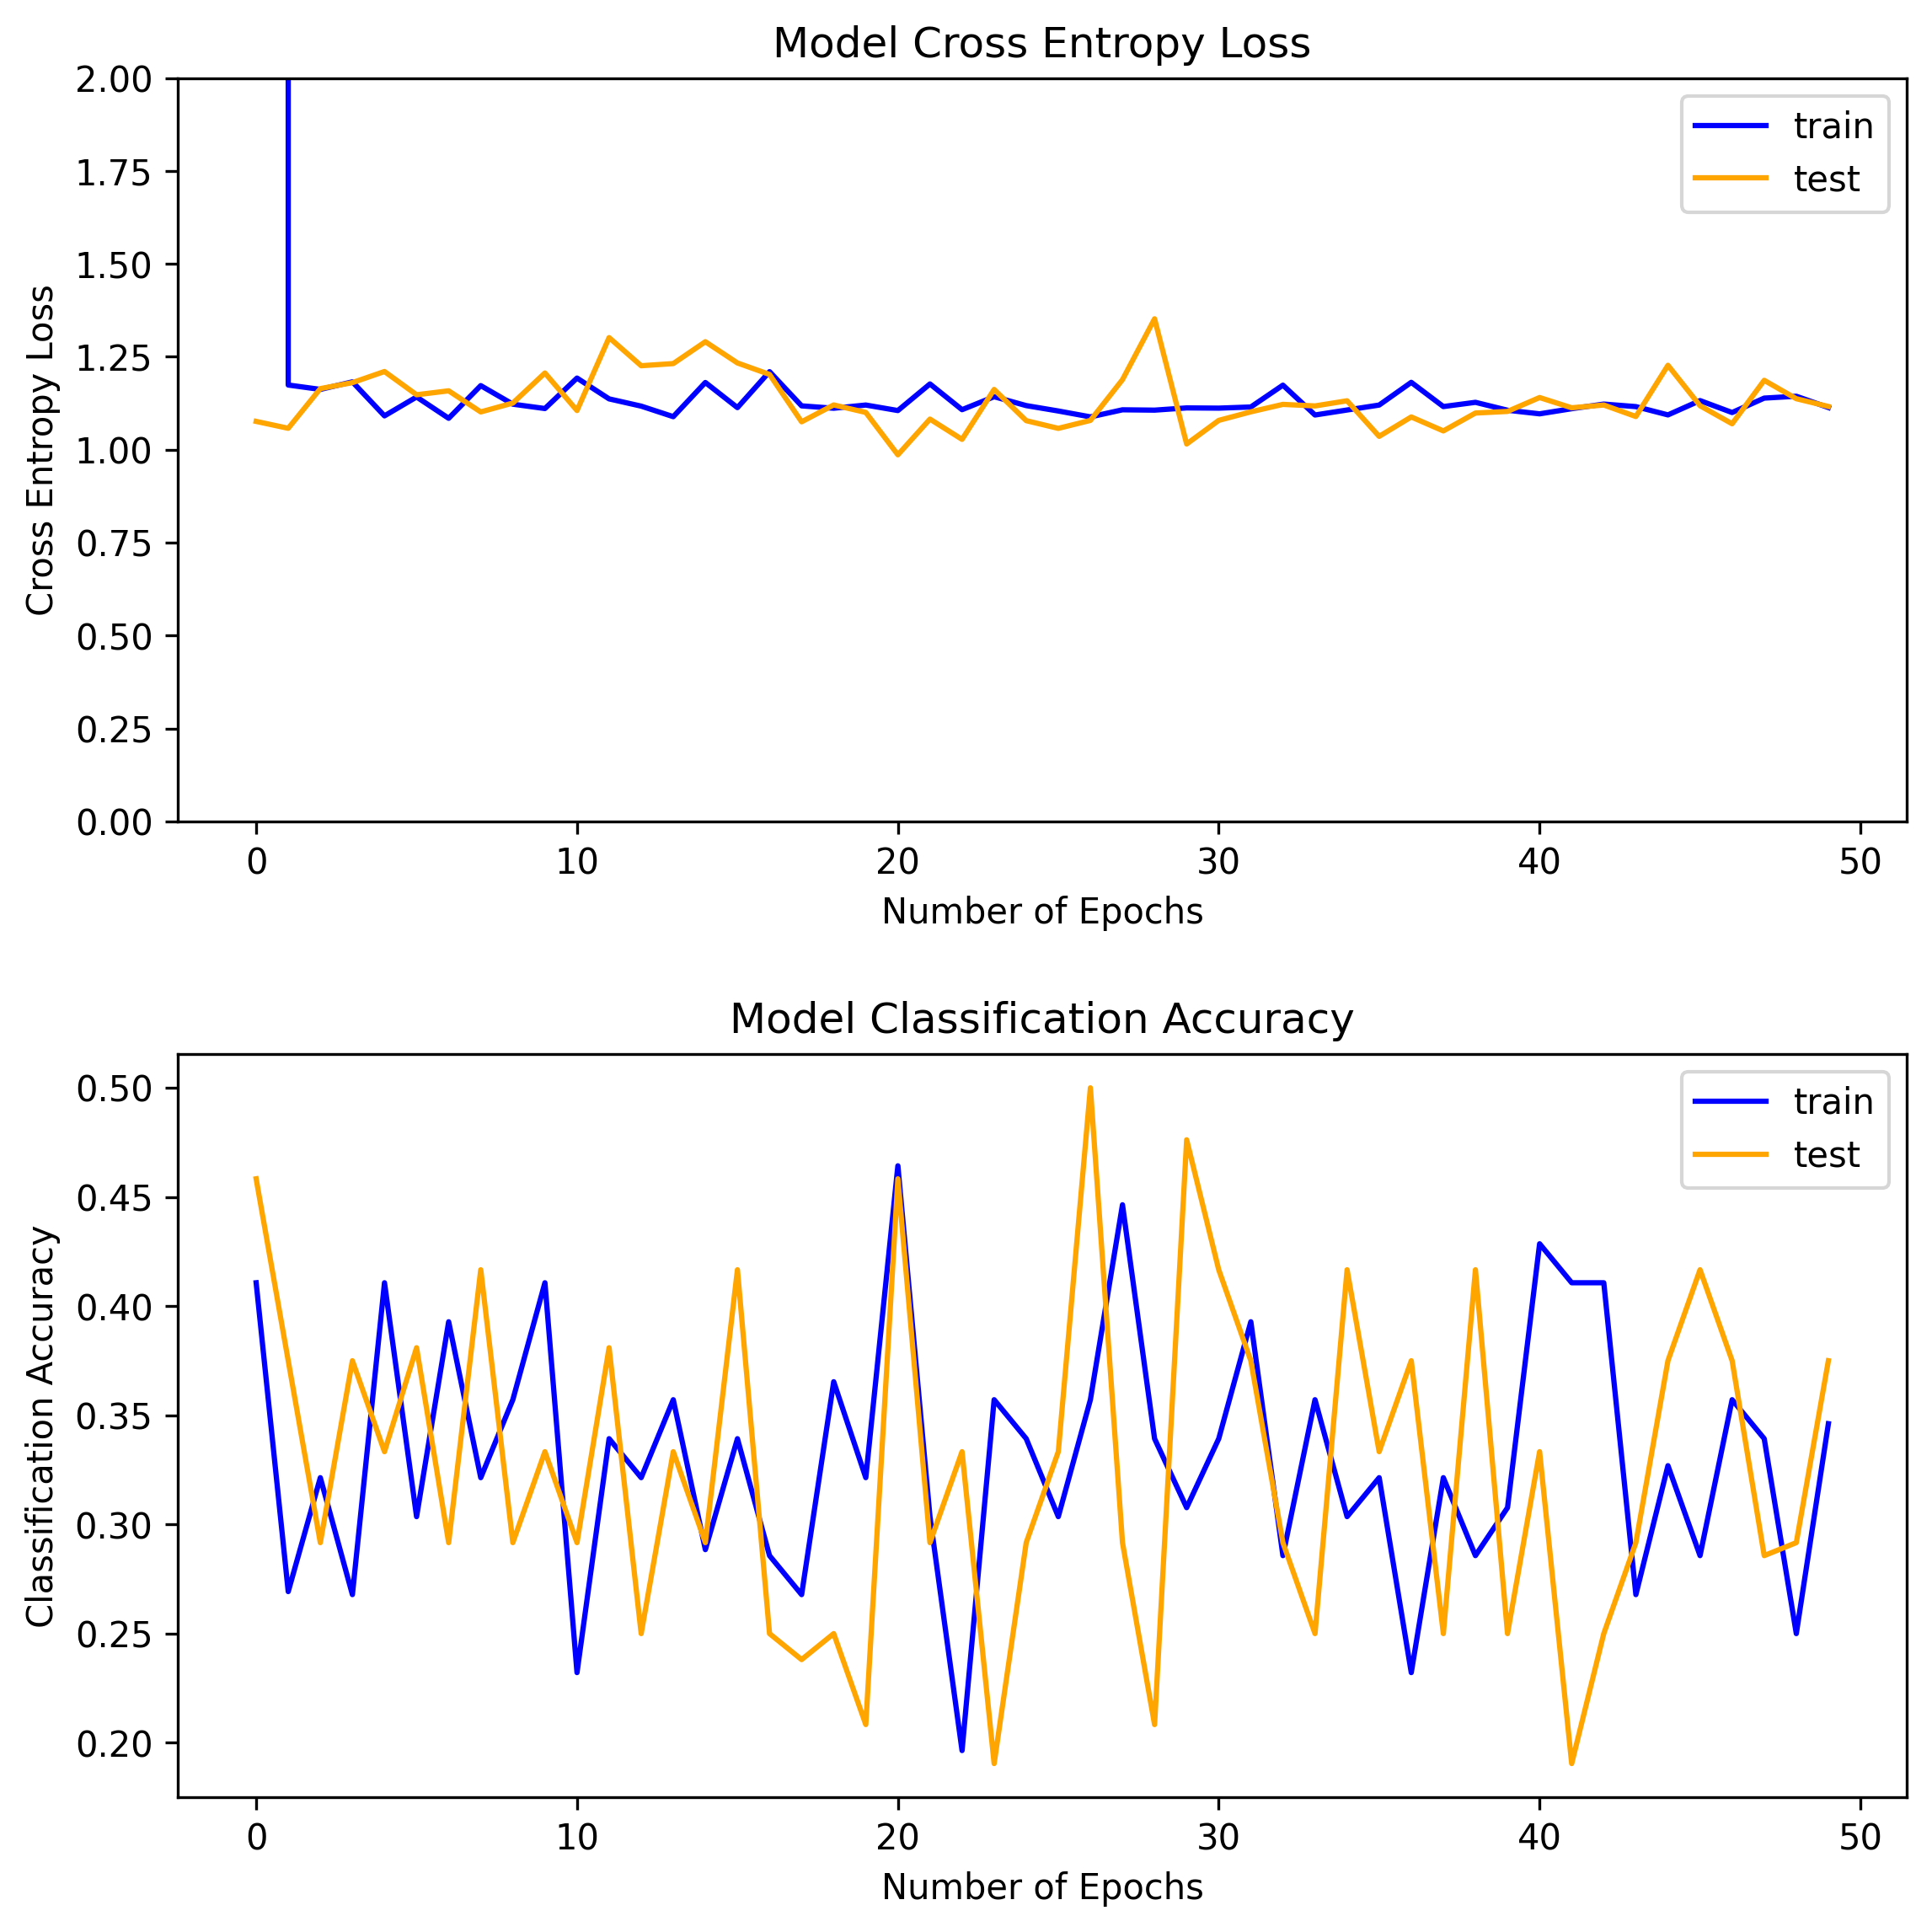

Waktu running Model = 0:11:41.052054


In [ ]:
# entry point, run the test harness
from datetime import datetime

toc = datetime.now()
run_test_harness()
tic = datetime.now()

print("Waktu running Model = {}".format(tic-toc))

In [ ]:
### tebak gambar
# open image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import os
 
# load and prepare the image
def load_image(folder):
  images = []
  filenames = []
  for filename in os.listdir(folder):
    img = load_img(os.path.join(folder,filename), target_size=(200, 200))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 200, 200, 3)
    img = img.astype('uint8')
    images.append(img)
    filenames.append(filename.replace(".jpg", " "))
  return images, filenames


In [ ]:
coba,nama = load_image('/content/gdrive/My Drive/Colab Notebooks/Dataset/RIPCurrent_keras/coba/')

In [ ]:
(coba[2].shape)
#len(coba)
#type(coba[1])
#print(coba[1])
#print(nama[1])

(1, 200, 200, 3)

In [ ]:
# load an image and predict the class
def run_example(img,name):
  import matplotlib.pyplot as plt
  import pandas as pd
  import numpy as np

  # load model
  model = load_model('rip_model.h5')
  #print(model.summary())
  # predict the class
  result = model.predict(img)
  plt.figure()
  img = img.reshape(200, 200, 3)
  #img = imread(img)
  imgplot = plt.imshow(img)
  plt.title('Nama File asli : {}'.format(name))
  a = np.asarray(result)
  hasil_klasifikasi = pd.DataFrame(a)
  hasil_klasifikasi.columns = ['norip', 'rip 1', 'rip 2'] 
  print ('   Hasil prediksi model : ')
  print(hasil_klasifikasi)

   Hasil prediksi model : 
      norip     rip 1     rip 2
0  0.716306  0.272072  0.011622


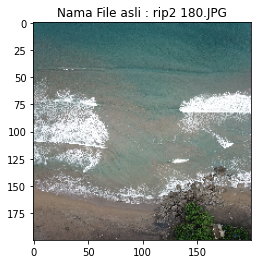

In [ ]:
run_example(coba[15],nama[15])

In [ ]:
model = load_model('rip_model.h5')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 640000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               163840256 
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 163,842,819
Trainable params: 163,842,819
Non-trainable params: 0
_________________________________________________________________
None
